In [1]:
import pickle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Dense, Conv2D, Reshape, concatenate, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from IPython.display import clear_output
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from random import randint
from sklearn.utils import shuffle
import keras
import pandas as pd
import os
import cv2
import scipy
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#to read data in for pickle to be used for python
pickle_in = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\X_test.pickle", "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\Data\y_test.pickle", "rb")
y_test = pickle.load(pickle_in)

In [3]:
dir_list = ['NEUTROPHIL', 'EOSINOPHIL','MONOCYTE','LYMPHOCYTE']# 1, 0

In [4]:
IMG_SIZE = 128

In [5]:
y_train_cell =[]
for x in y_train:
    if(x >= 2):
        y_train_cell.append(0)
    else:
        y_train_cell.append(1)

In [6]:
y_test_cell =[]
for x in y_test:
    if(x >= 2):
        y_test_cell.append(0)
    else:
        y_test_cell.append(1)

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
y_train_cell = np.array(y_train_cell)
y_test_cell = np.array(y_test_cell)

In [9]:
bnmomemtum=0.85
def fire(x, squeeze, expand):
  y  = Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
  y  = BatchNormalization(momentum=bnmomemtum)(y)
  y1 = Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
  y1 = BatchNormalization(momentum=bnmomemtum)(y1)
  y3 = Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
  y3 = BatchNormalization(momentum=bnmomemtum)(y3)
  return concatenate([y1, y3])

def fire_module(squeeze, expand):
  return lambda x: fire(x, squeeze, expand)

x = Input(shape=[IMG_SIZE, IMG_SIZE, 3])
y = BatchNormalization(center=True, scale=False)(x)
y = Activation('relu')(y)
y = Conv2D(kernel_size=5, filters=12, padding='same', use_bias=True, activation='relu')(x)
y = BatchNormalization(momentum=bnmomemtum)(y)

y = fire_module(12, 24)(y)
y = MaxPooling2D(pool_size=2)(y)

y = fire_module(24, 48)(y)
y = MaxPooling2D(pool_size=2)(y)

y = fire_module(32, 64)(y)
y = MaxPooling2D(pool_size=2)(y)

y = fire_module(24, 48)(y)
y = MaxPooling2D(pool_size=2)(y)

y = fire_module(18, 36)(y)
y = MaxPooling2D(pool_size=2)(y)

y = fire_module(12, 24)(y)

y = GlobalAveragePooling2D()(y)
y = Dense(1, activation='sigmoid')(y)
model = Model(x, y)
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.summary()

In [13]:
# Recreate the exact same model, including its weights and the optimizer
model.load_weights('weight_tr5_cell.h5')

#load save model

In [17]:
filepath = r"C:\Users\arifm\OneDrive\Documents\PRJ400\blood cells\weight_tr5_cell.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train,
         y_train_cell,
         epochs = 10,
         batch_size = 32,
         validation_split=0.2,
         shuffle=True,
         callbacks_list,
         verbose = 1)

NameError: name 'tensorboard_callback' is not defined

In [14]:
model.save_weights('weight_tr5_cell.h5')
model.save('model_cell.h5')

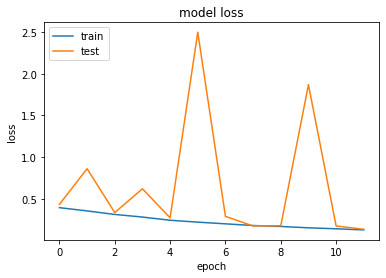

In [14]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve_cell.png')
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve_cell.png')

plot_learning_curve(history)

In [14]:
#making this predictions
predictions = model.predict(X_test)
print(np.argmax(predictions[0]))
#getting the max value of the prection

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv2d_1/convolution (defined at C:\Users\arifm\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_3987]

Function call stack:
keras_scratch_graph


In [12]:
pred_results = []
for i in range(len(predictions)):
    result = np.argmax(predictions[i])
    pred_results.append(result)
    print(result,y_test_cell[i])

NameError: name 'predictions' is not defined

In [12]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_cell, pred_results))

NameError: name 'pred_results' is not defined

In [21]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.9715003371238708
Training Loss: 0.12439508079378693
Validation Accuracy: 0.9593373537063599
Validation Loss: 0.1322755636460331


In [15]:
#evaluate model once loaded in
loss, acc = model.evaluate(X_test,  y_test_cell, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

Restored model, accuracy: 70.61%


In [15]:
pred_results = []
for i in range(len(predictions)):
    result = np.argmax(predictions[i])
    pred_results.append(result)

from sklearn.metrics import classification_report
from sklearn import metrics

print(metrics.confusion_matrix(y_test_cell,pred_results ))
print(metrics.classification_report(y_test_cell,pred_results, digits=2))

[[1240    0]
 [1247    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1240
           1       0.00      0.00      0.00      1247

    accuracy                           0.50      2487
   macro avg       0.25      0.50      0.33      2487
weighted avg       0.25      0.50      0.33      2487

